### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving AnnualTicketSales.csv to AnnualTicketSales.csv
Saving HighestGrossers.csv to HighestGrossers.csv
Saving TopDistributors.csv to TopDistributors.csv
Saving TopGenres.csv to TopGenres.csv
Saving TopGrossingRatings.csv to TopGrossingRatings.csv


In [ ]:
df_highGrossers=pd.read_csv("HighestGrossers.csv")
df_topGenres=pd.read_csv("TopGenres.csv")

### Analyzing the gross average according to movie genre

In [ ]:
df_topGenres["TOTAL GROSS"] = list(map(lambda x: x.replace(",", ""), df_topGenres["TOTAL GROSS"]))
df_topGenres["TOTAL GROSS"] = list(map(lambda x: int(x[1:]), df_topGenres["TOTAL GROSS"]))

df_topGenres["AVERAGE GROSS"] = list(map(lambda x: x.replace(",", ""), df_topGenres["AVERAGE GROSS"]))
df_topGenres["AVERAGE GROSS"] = list(map(lambda x: int(x[1:]), df_topGenres["AVERAGE GROSS"]))

In [ ]:
df_topGenres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102",64529536530,58556748,27.14%
1,2,Action,"1,098",49339974493,44936224,20.75%
2,3,Drama,"5,479",35586177269,6495013,14.97%
3,4,Comedy,"2,418",33687992318,13932172,14.17%
4,5,Thriller/Suspense,"1,186",19810201102,16703374,8.33%
5,6,Horror,716,13430378699,18757512,5.65%
6,7,Romantic Comedy,630,10480124374,16635118,4.41%
7,8,Musical,201,4293988317,21363126,1.81%
8,9,Documentary,"2,415",2519513142,1043277,1.06%
9,10,Black Comedy,213,2185433323,10260250,0.92%


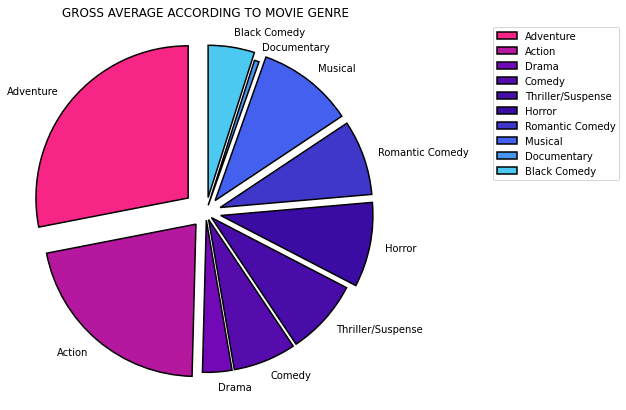

In [ ]:
fig = plt.figure(1,figsize =(10, 7))

colors = ["#f72585","#b5179e","#7209b7","#560bad","#480ca8","#3a0ca3","#3f37c9","#4361ee","#4895ef","#4cc9f0"]
explode = (0.15, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.05, 0.1)
plt.pie(df_topGenres["AVERAGE GROSS"], labels = df_topGenres["GENRES"], explode=explode, colors=colors, startangle=90,  wedgeprops = {'linewidth': 1.5, 'edgecolor' : "black"})

plt.legend(bbox_to_anchor=(1.6, 1), loc="best")
plt.title("GROSS AVERAGE ACCORDING TO MOVIE GENRE")
plt.show()

### Analyzing the genres of action and adventure per distributor

In [ ]:
# convert str $ to int
df_highGrossers["TOTAL FOR YEAR"] = list(map(lambda x: x.replace(",", ""), df_highGrossers["TOTAL FOR YEAR"]))
df_highGrossers["TOTAL FOR YEAR"] = list(map(lambda x: int(x[1:]), df_highGrossers["TOTAL FOR YEAR"]))
df_highGrossers.head(5)

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,"$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,"$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,"$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,"$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,"$776,153,749","8,47,32,942"


In [ ]:
df_per_genre = df_highGrossers[(df_highGrossers["GENRE"] == "Adventure") | (df_highGrossers["GENRE"] == "Action")]
genre_per_distr = df_per_genre.groupby(by=["DISTRIBUTOR", "GENRE"])["TOTAL FOR YEAR"].sum()

genre_per_distr = genre_per_distr.to_frame(name= "$ TOTAL FOR YEAR").reset_index()

In [ ]:
genre_per_distr

,DISTRIBUTOR,GENRE,$ TOTAL FOR YEAR
0,20th Century Fox,Action,380270577
1,20th Century Fox,Adventure,736612605
2,Dreamworks SKG,Adventure,441226247
3,Paramount Pictures,Action,402111870
4,Paramount Pictures,Adventure,443319081
5,Sony Pictures,Adventure,990886730
6,Universal,Adventure,253367455
7,Walt Disney,Action,3284103129
8,Walt Disney,Adventure,1705119807
9,Warner Bros.,Action,381011219


In [ ]:
genre_action_per_distr = genre_per_distr[genre_per_distr["GENRE"] == "Action"]
genre_adventure_per_distr = genre_per_distr[genre_per_distr["GENRE"] == "Adventure"]

In [ ]:
genre_action_per_distr

,DISTRIBUTOR,GENRE,$ TOTAL FOR YEAR
0,20th Century Fox,Action,380270577
3,Paramount Pictures,Action,402111870
7,Walt Disney,Action,3284103129
9,Warner Bros.,Action,381011219


In [ ]:
genre_adventure_per_distr.columns

Index(['DISTRIBUTOR', 'GENRE', '$ TOTAL FOR YEAR'], dtype='object')

Top grossing distributors for each year based on the tickets sold for each movie of adventure genre 



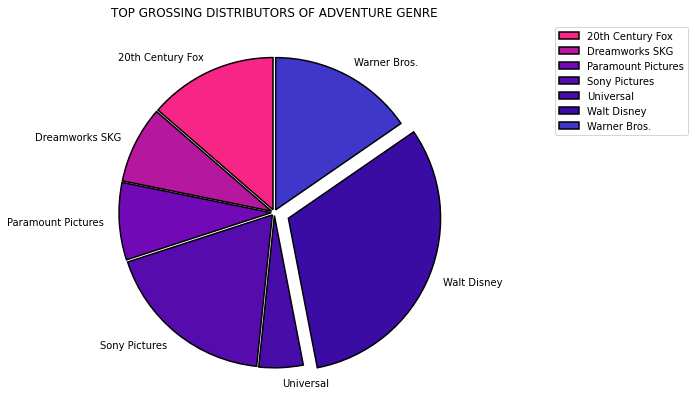

In [ ]:
fig = plt.figure(2,figsize =(10, 7))

colors = ["#f72585","#b5179e","#7209b7","#560bad","#480ca8","#3a0ca3","#3f37c9"]
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.02)
plt.pie(genre_adventure_per_distr["$ TOTAL FOR YEAR"], labels = genre_adventure_per_distr["DISTRIBUTOR"], explode=explode, colors=colors, startangle=90,  wedgeprops = {'linewidth': 1.5, 'edgecolor' : "black"})

plt.legend(bbox_to_anchor=(1.6, 1), loc="best")
print("Top grossing distributors for each year based on the tickets sold for each movie of adventure genre \n")
plt.title("TOP GROSSING DISTRIBUTORS OF ADVENTURE GENRE")
plt.show()

Top grossing distributors for each year based on the tickets sold for each movie of action genre 



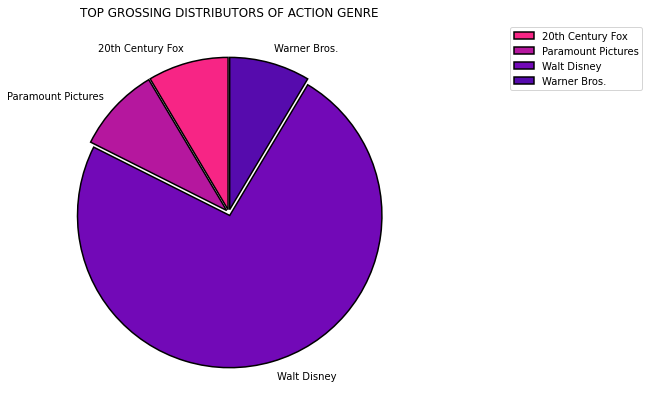

In [ ]:
fig = plt.figure(3,figsize =(10, 7))

colors = ["#f72585","#b5179e","#7209b7","#560bad"]
explode = (0.02, 0.02, 0.02, 0.02)
plt.pie(genre_action_per_distr["$ TOTAL FOR YEAR"], labels = genre_action_per_distr["DISTRIBUTOR"], explode=explode, colors=colors, startangle=90,  wedgeprops = {'linewidth': 1.5, 'edgecolor' : "black"})

plt.legend(bbox_to_anchor=(1.6, 1), loc="best")
print("Top grossing distributors for each year based on the tickets sold for each movie of action genre \n")
plt.title("TOP GROSSING DISTRIBUTORS OF ACTION GENRE")
plt.show()

### Conclusion


We can conclude, looking at the average gross income of each genre, the ones that raised the most were the adventure and action genres.

When analyzing the highest grossing movies in the action genre, we can see that the distributors that reign in this market are: Disney (having a wide difference in average gross income), followed by Warner Bros, Paramount and Fox.

While in the adventure genre we can see the cake is a little better distributed among distributors, likewise the company that continues to reign is still Disney.

Podemos concluir, viendo los ingresos brutos promedio de cada genero, los que mas recaudaron fueron los generos de aventura y accion.

Al analizar las peliculas mas taquilleras en el genero de accion, podemos observar que los distribuidores que reinan este mercado son: Disney (teniendo una amplia diferencia en los ingresos brutos promedio), seguido por Warner Bros, Paramount y Fox.

Mientras que en el genero de aventura podemos ver la torta se encuentra un poco mejor distribuida entre los distribuidores, asi mismo la empresa que sigue reinando sigue siendo Disney.